In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from scipy import signal
from scipy import optimize
from scipy import ndimage
from math import erf
plt.style.use('cashaback_dark')
from tqdm import tqdm

GET FIRST RAW MOMENT (EXPECTED VALUE)

In [119]:
timesteps = np.arange(0,2000,1)
agent_mu,agent_sd = 1000,150
timing_mu,timing_sd = 1000,150

timing_pdf = stats.norm.pdf(timesteps,timing_mu,timing_sd)
agent_pdf = stats.norm.pdf(timesteps,agent_mu,agent_sd)

prob_timing_greater_agent = 1 - stats.norm.cdf(0,timing_mu - agent_mu,np.sqrt(timing_sd**2+agent_sd**2))

ev_agent_check = np.sum(timesteps*agent_pdf) # This is the value (timesteps) multiplied by the prob of getting that, should be 10000
ev_agent = 1000

ev_skewed_agent = ev_agent*prob_timing_greater_agent # FIRST MOMENT

GET SECOND CENTRAL MOMENT (VARIANCE)

$V(X) = E[Z^2] - E[Z]^2$

where Z = X - Y

First Three Sample Moments of Agent Dist

In [120]:
M1A = np.sum(timesteps*agent_pdf)
M2A = np.sum((timesteps**2)*agent_pdf)
M3A = np.sum((timesteps**3)*agent_pdf)


First Three Sample Moments of Skewed Agent Dist 

$E[X*1_{X<Y}] = E[X]*E[1_{X<Y}]$

where $E[1_{X<Y}] = P(X<Y)$

In [121]:
prob_timing_greater_agent

0.5

In [122]:
M1 = np.sum(timesteps*agent_pdf*agent_cdf)*prob_timing_greater_agent
M2 = np.sum((timesteps**2)*agent_pdf)*prob_timing_greater_agent**2
M3 = np.sum((timesteps**3)*agent_pdf)*prob_timing_greater_agent

In [123]:
var_skewed_agent = M2A*prob_timing_greater_agent - (M1A**2)*prob_timing_greater_agent
sd_skewed_agent = np.sqrt(var_skewed_agent)
sd_skewed_agent

106.06601717526344

In [124]:
skewness_skewed_agent = np.sum(timesteps**3*(agent_pdf))*prob_timing_greater_agent**3 - (np.sum(timesteps*agent_pdf)*prob_timing_greater_agent)**3
skewness_skewed_agent

-5732046.42764163

In [126]:
ev_skewed_agent = np.sum(timesteps[:1200]*agent_pdf[:1200])

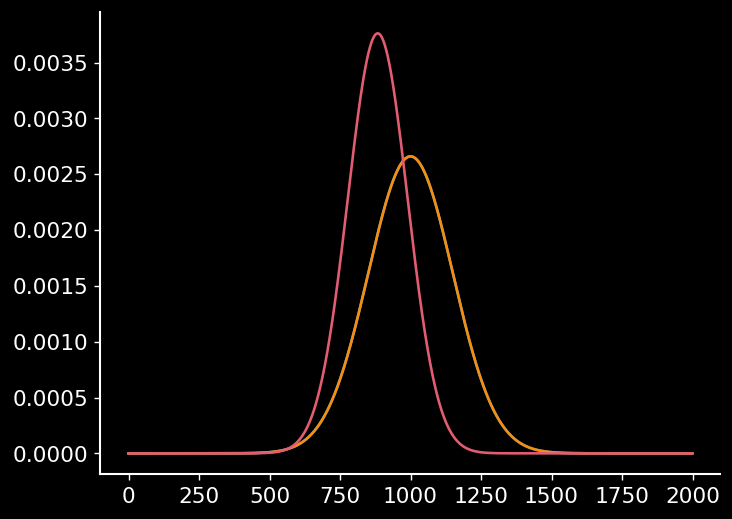

In [127]:
fig,ax = plt.subplots()
ax.plot(agent_pdf)
ax.plot(timing_pdf)
ax.plot(stats.norm.pdf(timesteps,ev_skewed_agent,sd_skewed_agent))

In [ ]:
np.sum(timesteps*agent_pdf*